# Convert orbital elements in cartesian coordinates and velocities

This notebook convert orbital elements in cartesian coordinates and velocities.

The input is a table with the [positions and velocities](../data/xv.csv)

## Import modules

In [1]:
# Plots inline
%matplotlib inline

# Import modules
import os
import sys
sys.path.insert(0, '../src/oe2xv/') # For orbel program
from orbel_mac import orbel_el2xv
#from orbel_linux import orbel_el2xv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import yaml

## Settings

In [2]:
# Matplotlib config
plt.style.use('ggplot')
font = {'size'   :  16}
matplotlib.rc('font', **font)

In [3]:
# Definitons
path_proj = os.getcwd()

with open('../src/parameters.yaml', "r") as f:
    parameters = yaml.load(f)
    
n_planets = parameters["n_planets"]
n_clones = parameters["n_clones"]
n_lines = n_planets * n_clones
gm = parameters["gm"]
ialpha = parameters["ialpha"]

## Read orbital elements

In [4]:
# Read orbial elements. 
oe = pd.read_csv('../data/oe.csv')
oe.head()

,a,e,i,capom,omega,capm
0,0.387098,0.000393,0.016586,251.025109,288.709639,132.827011
1,0.723327,0.000539,0.036557,191.248113,288.440720,202.223117
2,1.000372,0.000445,0.013753,15.174005,339.929885,187.707600
3,1.523678,0.000192,0.035616,206.705288,323.702897,37.244802
4,5.205109,0.000326,0.014810,311.275892,222.116643,334.210634


## Call orbel module and convert coordinates

In [5]:
# Applying orbel function and create dataframe xv with postions and velocities
# Note: no need loop
xv = {'v': oe.apply(lambda row: orbel_el2xv(gm, ialpha, row['a'], row['e'], row['i'], row['capom'], \
                                            row['omega'],row['capm']), axis=1)}
# Transform Serie into dataframe
xv = pd.DataFrame(xv)

# Splits the tuples column and then removes it
xv = pd.DataFrame(xv['v'].values.tolist(), columns=['x', 'y', 'z', 'vx', 'vy', 'vz'])
xv.head()

,x,y,z,vx,vy,vz
0,0.373832,0.100038,0.003430,-2.609200,9.757295,0.141625
1,-0.710420,-0.134439,0.014405,1.374141,-7.256771,0.226510
2,-0.774681,0.632441,-0.002065,-3.972189,-4.868411,0.085445
3,-0.854512,1.261065,0.017867,-4.213031,-2.852890,-0.171172
4,4.505686,2.604836,-0.020260,-1.377785,2.384577,-0.039358


## Save file

In [6]:
# Save data
xv.to_csv('../data/xv.csv', index=False)

## Verifying results

### Inner planets' x and y coordinates 

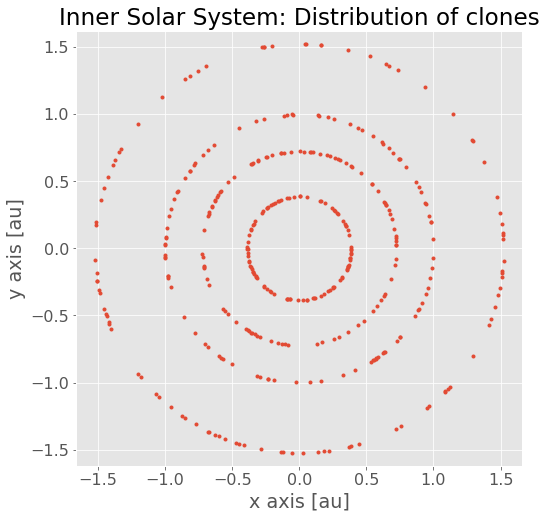

In [7]:
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.xlim(-1.62,1.62)
plt.ylim(-1.62,1.62)
plt.title("Inner Solar System: Distribution of clones")
plt.xlabel("x axis [au]")
plt.ylabel("y axis [au]")
plt.plot(xv['x'], xv['y'], '.')

### Giant planets

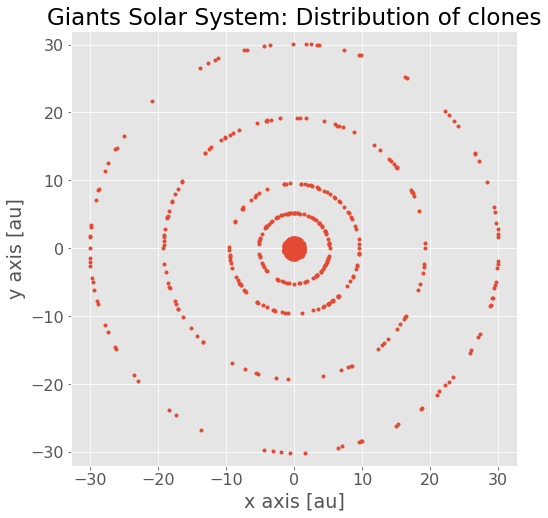

In [8]:
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.xlim(-32.0,32.0)
plt.ylim(-32.0,32.0)
plt.title("Giants Solar System: Distribution of clones")
plt.xlabel("x axis [au]")
plt.ylabel("y axis [au]")
plt.plot(xv['x'], xv['y'], '.')